# Overfitting and Regularisation in Neural Networks

Simple examples to illustrate overfitting and regularisation in neural networks on a toy data set.

Note:
    Figures are exported to a directory "../figures"


## Imports

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overfitting-and-Regularisation-in-Neural-Networks" data-toc-modified-id="Overfitting-and-Regularisation-in-Neural-Networks-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overfitting and Regularisation in Neural Networks</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li></ul></li><li><span><a href="#Implementations-of-helpers" data-toc-modified-id="Implementations-of-helpers-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Implementations of helpers</a></span><ul class="toc-item"><li><span><a href="#Plots" data-toc-modified-id="Plots-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plots</a></span></li><li><span><a href="#Example-data" data-toc-modified-id="Example-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Example data</a></span></li></ul></li><li><span><a href="#Experiments" data-toc-modified-id="Experiments-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Experiments</a></span><ul class="toc-item"><li><span><a href="#Set-parameters" data-toc-modified-id="Set-parameters-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Set parameters</a></span></li><li><span><a href="#Maximum-Likelihood-Training" data-toc-modified-id="Maximum-Likelihood-Training-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Maximum Likelihood Training</a></span></li><li><span><a href="#Early-Stopping" data-toc-modified-id="Early-Stopping-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Early Stopping</a></span></li><li><span><a href="#Regularization" data-toc-modified-id="Regularization-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Regularization</a></span><ul class="toc-item"><li><span><a href="#Desiscion-Regions" data-toc-modified-id="Desiscion-Regions-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Desiscion Regions</a></span></li><li><span><a href="#Weight-plot" data-toc-modified-id="Weight-plot-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Weight plot</a></span></li></ul></li></ul></li></ul></div>

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from numpy import random as rnd 

from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

from matplotlib2tikz import save as tikz_save

/home/spock/.virtualenvs/tensorflow/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/home/spock/.virtualenvs/tensorflow/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [210]:
mpl.style.use('default')
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rcParams.update({'font.size': 18})

# Implementations of helpers

## Plots

In [85]:
def plot_cross(x, y, l, ax=None):
    if ax is None:
        ax = plt.gca()
        
    ax.add_artist(plt.Line2D([x-l, x+l], [y, y], color='C0'))
    ax.add_artist(plt.Line2D([x, x], [y-l, y+l], color='C0'))
    
    return ax

def plot_circle(x, y, l, r, color=None, ax=None):
    """
    Plot a circle at x,y  with radius r and a cross in the center
    with line lenght l.
    
    Args:
        x: x coordindate
        y: y coordindate
        l: line length 
        r: radius 
        color: color
        
    Returns:
        axis
    """
    if ax is None:
        ax = plt.gca()
        
    ax.add_artist(plt.Line2D([x-l, x+l], [y, y], color=color))
    ax.add_artist(plt.Line2D([x, x], [y-l, y+l], color=color))
    ax.add_artist(
            plt.Circle(c, r , color=color, fill=False, ls='--')
        )
    
    return ax

In [8]:
def plot_descision_region(clf, X, y, predict_proba=True, figsize=(10,10), ax=None, plot_samples=True):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    if predict_proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
        Z = Z[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)

    if ax is None: 
        plt.figure(figsize=figsize)
        ax = plt.gca()    
    ax.contourf(xx, yy, Z, alpha=0.4)
    if plot_samples is True:
        ax.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k')
    ax.set_aspect('equal')
    ax.set_xlabel('$x_1$', fontsize=20)
    ax.set_ylabel('$x_2$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    return ax

## Example data

In [ ]:
def make_classification_xor_gauss(n, random_state=None, scale=1, noise=1):
    rnd.seed(random_state)
    x = np.array( [(rnd.randint(0,2), rnd.randint(0,2)) for i in range(n)])
    y = np.apply_along_axis(lambda x: np.mod(x[0]+x[1],2), 1, x)
    x = 1-2*x
    x = rnd.normal(loc=scale*x, scale=noise)

    return x, y

Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


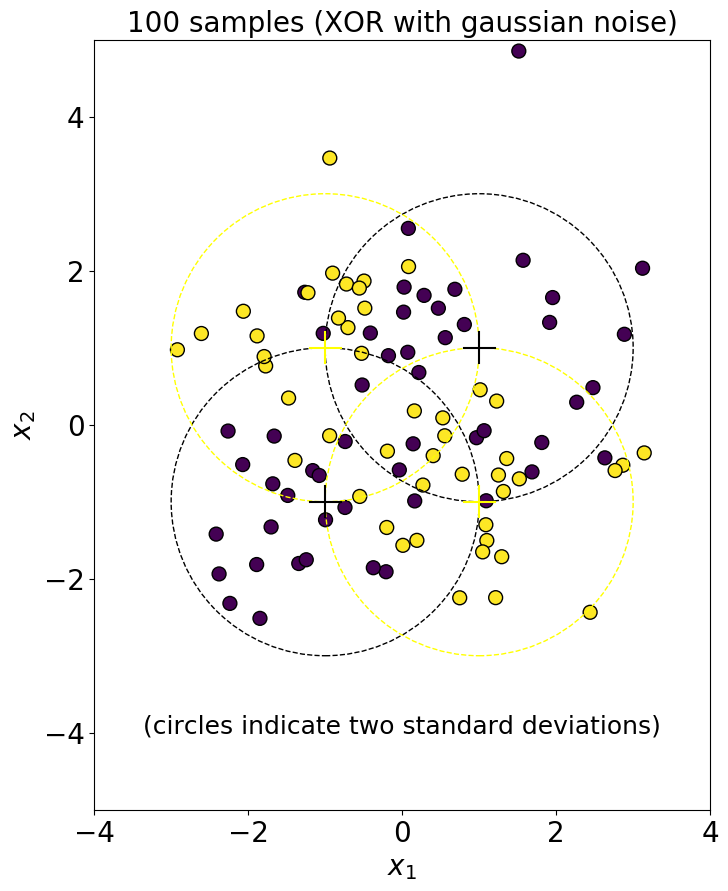

In [203]:
X, y = make_classification_xor_gauss(100, 42, scale=1)
                          
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', s=100)
plt.axes().set_aspect('equal')
plt.xlabel('$x_1$', fontsize=20)
plt.ylabel('$x_2$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)

ax = plt.gca()
for c, color in zip([(-1,-1), (1,1), (-1,1), (1,-1)], ['black', 'black', 'yellow', 'yellow']):
    plot_circle(c[0], c[1], l=0.2, r=2, color=color, ax=ax)

plt.xlim(-4, 4)
plt.ylim(-5, 5)
plt.text(0, -4, '(circles indicate two standard deviations)', fontsize=18, horizontalalignment='center')
plt.title('100 samples (XOR with gaussian noise)', fontsize=20)


tikz_save("../figures/samples.tikz",
          figureheight = '\\figureheight',
          figurewidth = '\\figurewidth',
         )

plt.savefig('../figures/samples.png')

# Experiments 

Experiments used the parameters below.

The error of each method is estimated on a *test set* consisting of 1000 samples for pedagogical reasons.


## Set parameters

In [204]:
hidden_layer_sizes = (100, 100, )
n_samples = 100
X_train, y_train = make_classification_xor_gauss(n_samples, random_state=42)
X_test, y_test = make_classification_xor_gauss(1000, random_state=10815)

## Maximum Likelihood Training

/home/spock/.virtualenvs/tensorflow/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


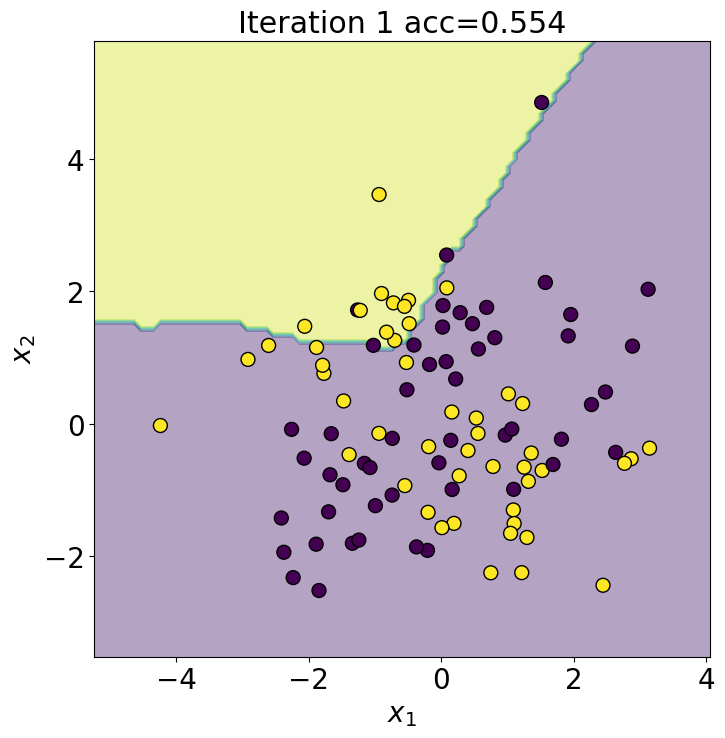

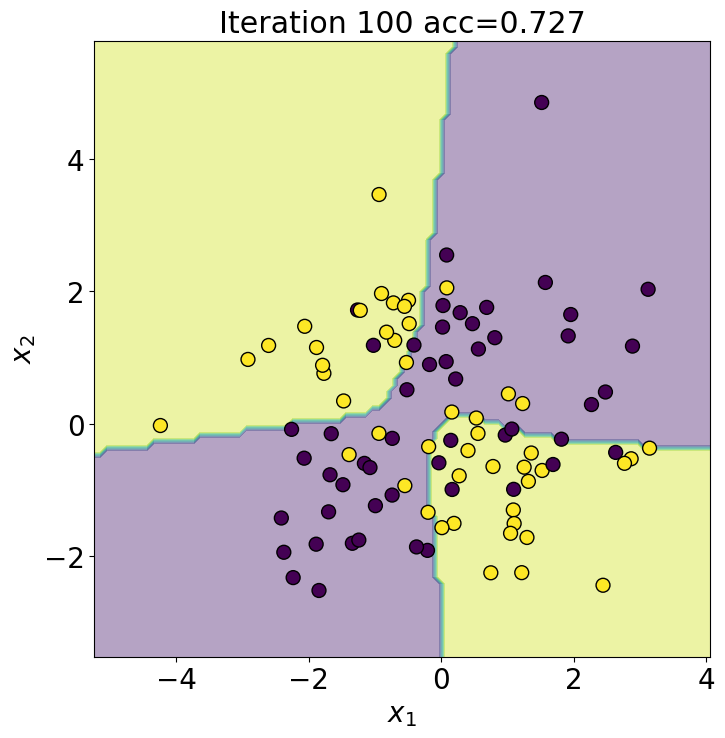

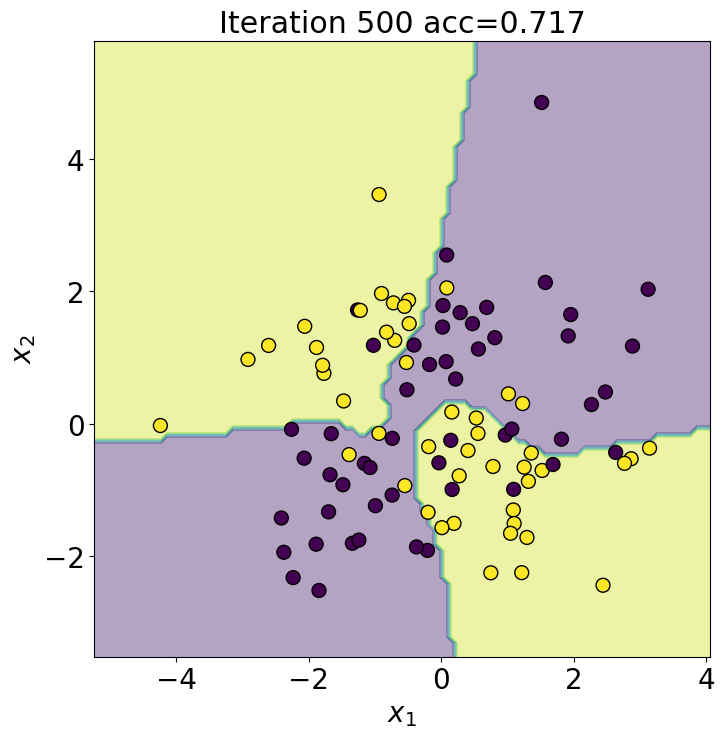

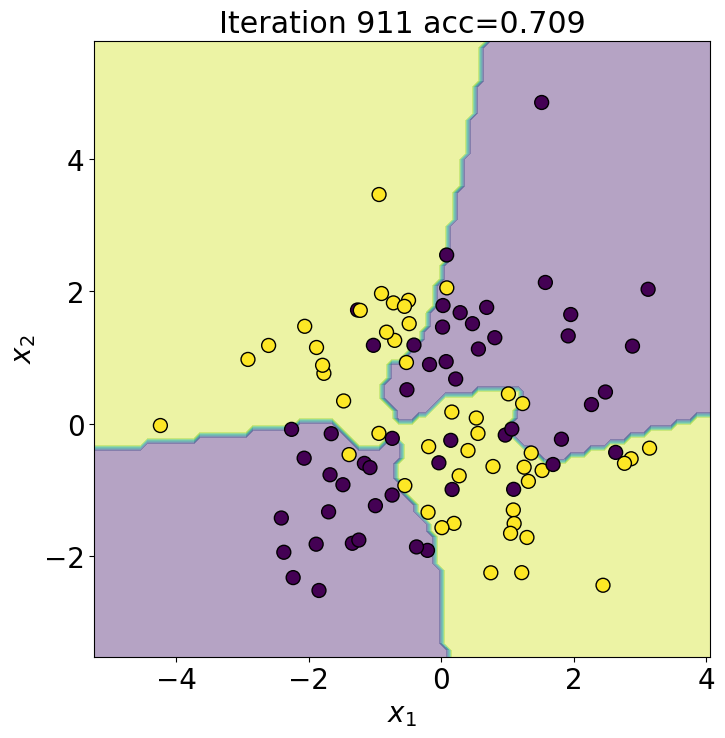

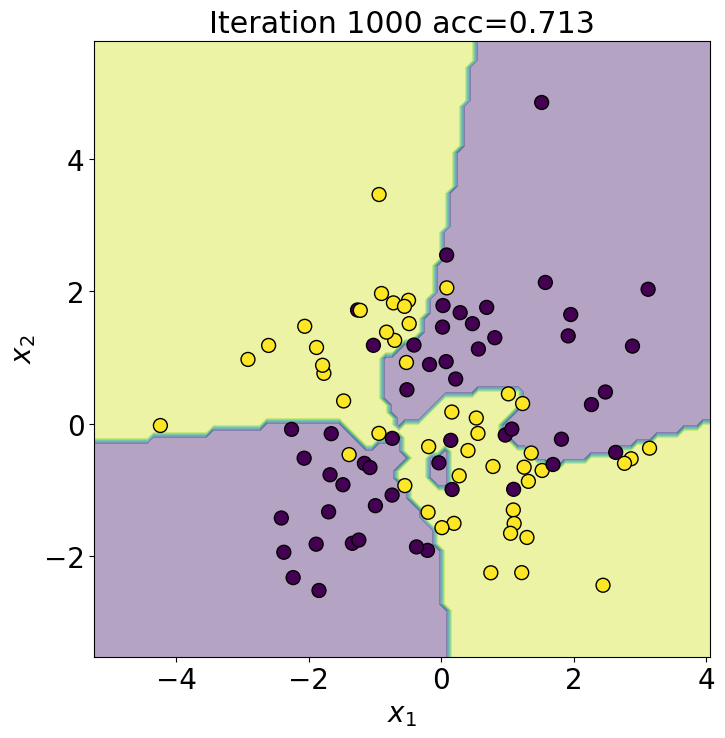

In [227]:
clf2 = MLPClassifier(
                hidden_layer_sizes=hidden_layer_sizes,
                solver='adam',
                alpha=0.0, 
                learning_rate='constant',
                learning_rate_init=0.001,
                max_iter=1,
                warm_start=True,
                random_state=42)

trials = 1000
acc = np.zeros(trials)
acc_train = np.zeros(trials)
loss_c = np.zeros(trials)

for i in range(trials):
    clf2.fit(X_train, y_train)
    acc[i] = clf2.score(X_test, y_test)
    acc_train[i] = clf2.score(X_train, y_train)
    loss_c[i] = clf2.loss_
    
    if i==0 or i==clf_n_iter or i==99 or i==499 or i==trials-1:
        plt.figure()
        plot_descision_region(clf2, X_train, y_train, predict_proba=False, figsize=(8, 8))
        plt.title('Iteration {} acc={}'.format(i+1, acc[i]))
        plt.savefig('../figures/ml_descision_region_{}.png'.format(i+1))

# save last figure
plt.savefig('../figures/ml_descision_region.png')

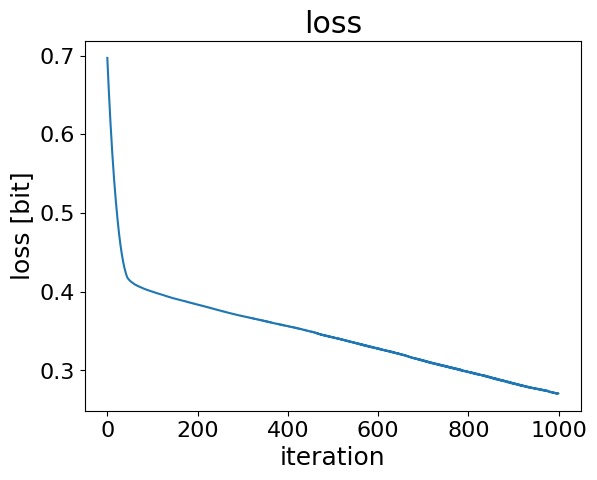

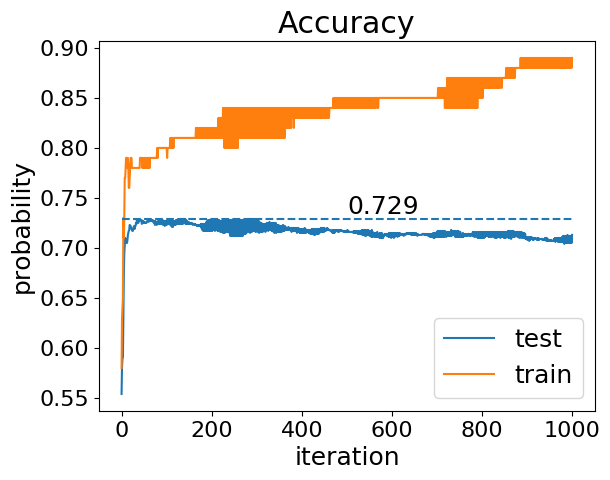

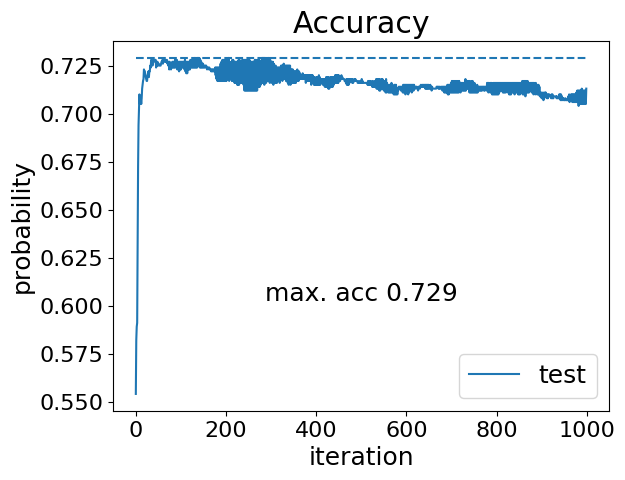

In [213]:
plt.figure()
plt.plot(loss_c)
plt.title('loss')
plt.xlabel('iteration')
plt.ylabel('loss [bit]')
plt.savefig('../figures/ml_loss.png')

plt.figure()
plt.title('Accuracy')

plt.plot(acc, label='test')
plt.plot(acc_train, label='train')

plt.plot([0, len(acc)], [acc.max(), acc.max()], c='C0', ls='--')
plt.text(500, acc.max(), '{}'.format(acc.max()), va='bottom')
plt.xlabel('iteration')
plt.ylabel('probability')
plt.legend()
plt.savefig('../figures/ml_acc.png')


plt.figure()
plt.title('Accuracy')
plt.plot(acc, label='test')
plt.plot([0, len(acc)], [acc.max(), acc.max()], c='C0', ls='--')
plt.text(500, 0.6, 'max. acc {}'.format(acc.max()), va='bottom', ha='center')
plt.xlabel('iteration')
plt.ylabel('probability')
plt.legend()
#plt.xlim(0.65, 0.8)
plt.savefig('../figures/ml_acc_test.png');
    
#plt.savefig('../figures/descision_region_ml.png')
#ax = plot_descision_region(clf, X_train, y_train, predict_proba=False, figsize=(8, 8))

## Early Stopping 

In [219]:
clf = MLPClassifier(
                hidden_layer_sizes=hidden_layer_sizes,
                solver='adam',
                alpha=0.0, 
                learning_rate='constant',
                learning_rate_init=0.001,
                max_iter=1,
                warm_start=True,
                random_state=42
                )

trials = 1000
acc = np.zeros(trials)
acc_val = np.zeros(trials)
acc_train = np.zeros(trials)
loss_c = np.zeros(trials)

X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, 
                                                    test_size=0.2,
                                                    stratify=y_train,
                                                    random_state=9191
                                                   )

for i in range(trials):
    clf.fit(X_train2, y_train2)
    #ax = plot_descision_region(clf, X, y, predict_proba=False, figsize=(8, 8))
    acc[i] = clf.score(X_test, y_test)
    acc_train[i] = clf.score(X_train2, y_train2)
    acc_val[i] = clf.score(X_val, y_val)

/home/spock/.virtualenvs/tensorflow/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


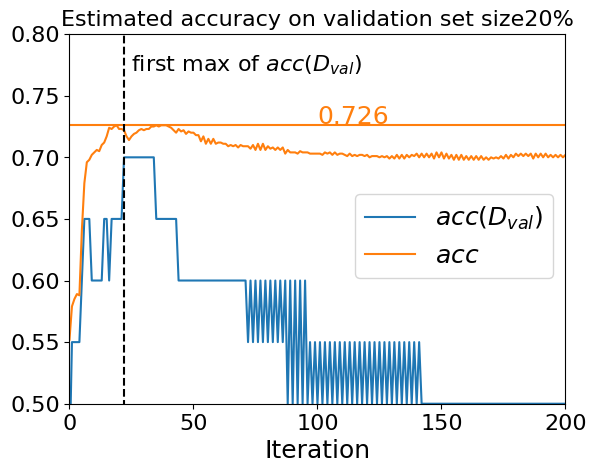

In [221]:
plt.plot(acc_val, label='$acc(D_{val})$', c='C0')
plt.plot(acc, label='$acc$', c='C1')
plt.title('Estimated accuracy on validation set size20%', fontsize=16)
plt.xlabel('Iteration')
plt.ylim(0.5, 0.8)
plt.xlim(0,200)
plt.plot((0, len(acc)), (acc.max(), acc.max()), c='C1')

plt.text(100, acc.max()+0.001, acc.max(), color='C1')

x_max = acc_val.argmax()
plt.plot((x_max, x_max), (0, 1.0), ls='--', color='black')
plt.text(25, 0.77, 'first max of $acc(D_{val})$', fontsize=16)
plt.legend(bbox_to_anchor=(1, 0.6))
plt.savefig('../figures/early_stopping.png')

## Regularization

### Desiscion Regions

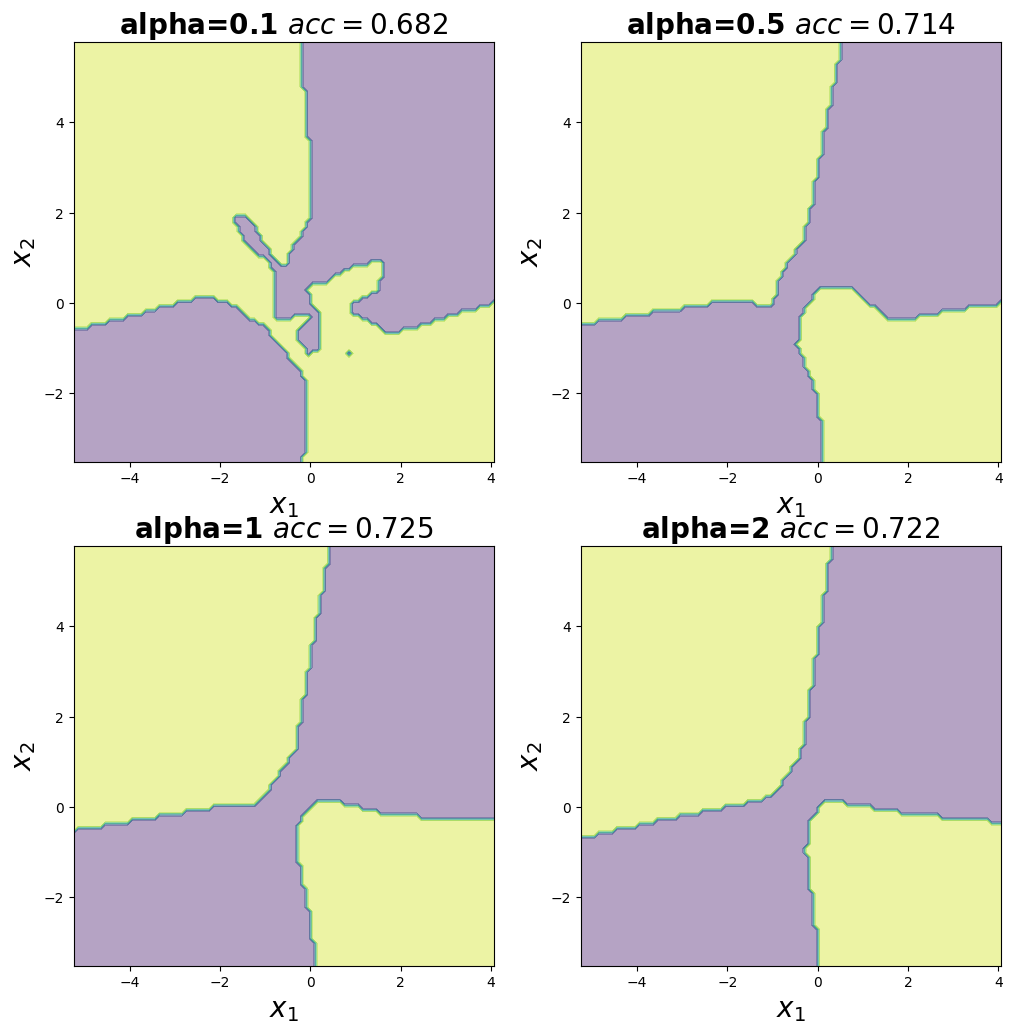

In [216]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))

axs = axs.reshape(-1)

clfs = list()
alphas = [0.1, 0.5, 1, 2]

for ax, alpha in zip(axs, alphas):

    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                    solver='adam',
                    alpha=alpha, 
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    random_state=42,
                    max_iter=1000)

    clf.fit(X_train, y_train)
    clfs.append(clf)
    #X, y = make_classification_xor_gauss(1000, random_state=10815)
    ax = plot_descision_region(clf, X_train, y_train, predict_proba=False, ax=ax, plot_samples=False)
    acc = clf.score(X_test, y_test)
    ax.set_title("alpha={} $acc = {}$".format(alpha, acc),fontsize=20, weight='bold')
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_aspect('equal')
    
plt.savefig('../figures/regularisation.png')

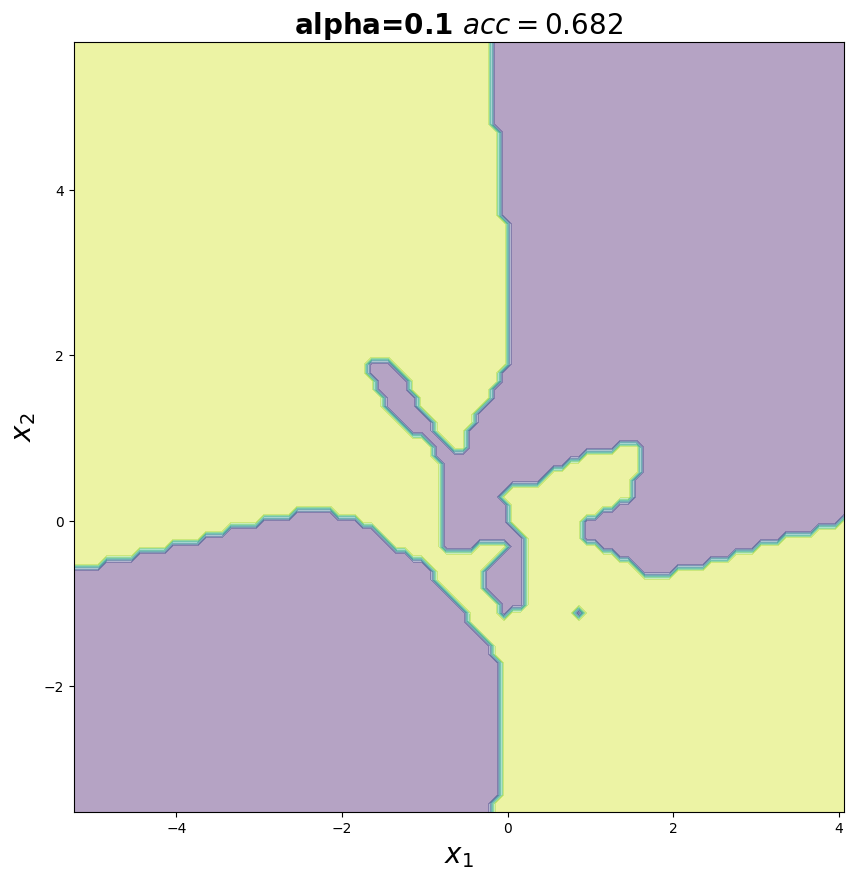

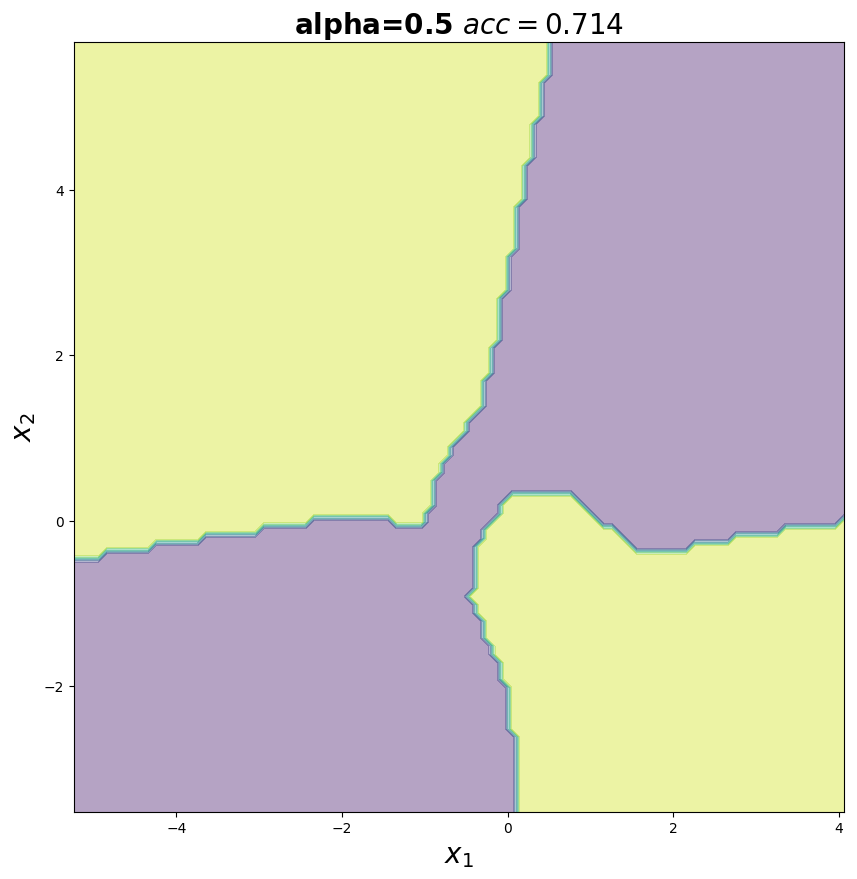

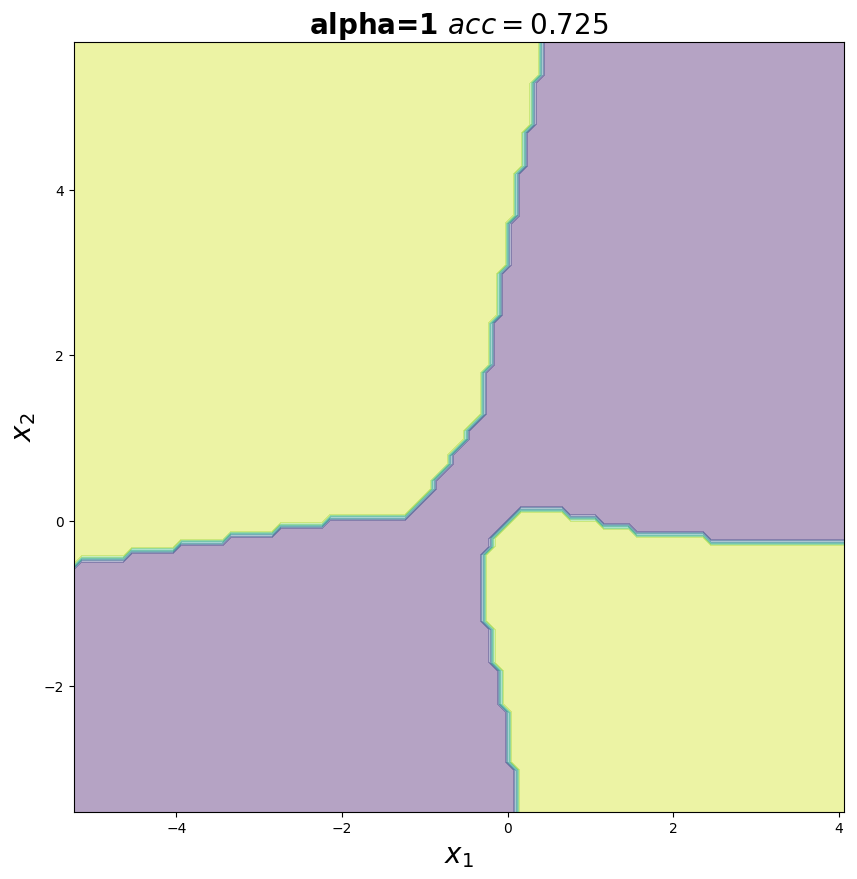

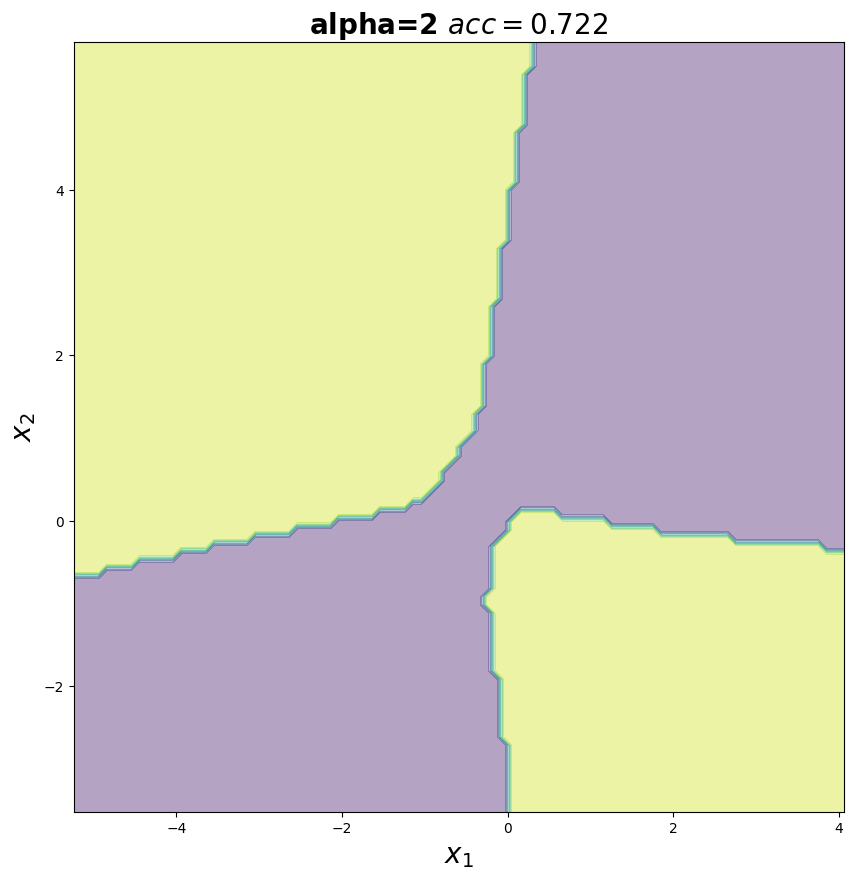

In [225]:
# same as before but with seperated plots

axs = axs.reshape(-1)

clfs = list()
alphas = [0.1, 0.5, 1, 2]

for alpha in alphas:
    #fig, axs = plt.subplots(1, 2, figsize=(12,12))
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                    solver='adam',
                    alpha=alpha, 
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    random_state=42,
                    max_iter=1000)

    clf.fit(X_train, y_train)
    clfs.append(clf)
    
for  i, clf in enumerate(clfs):
    ax = plot_descision_region(clf, X_train, y_train, predict_proba=False, plot_samples=False)
    acc = clf.score(X_test, y_test)
    ax.set_title("alpha={} $acc = {}$".format(alphas[i], acc),fontsize=20, weight='bold')
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_aspect('equal')
    plt.savefig('../figures/regularisation_{}.png'.format(i))

### Weight plot

Histograms of the weights of the last layer.

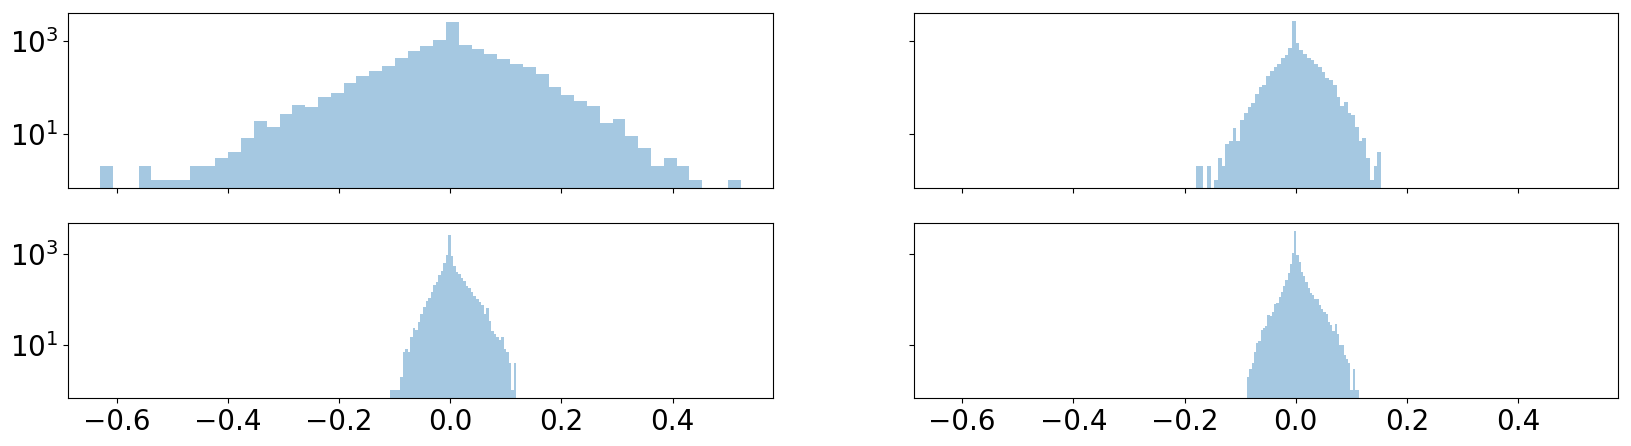

In [217]:
fig, axs = plt.subplots(2, 2, figsize=(20,5), sharey='row', sharex='all')
axs = axs.reshape(-1)

for i, ax in enumerate(axs):
    c = clfs[i]
    sns.distplot( c.coefs_[-2].reshape(-1) , ax=ax, kde=False)
    ax.tick_params(axis='both', which='major', labelsize=20)
    #ax.semilogy()
    ax.set_yscale('log')
    #ax.set_title("$alpha={}$".format(alphas[i]))